# Project_3_Biogic_analysis
Qing Dou

## 1 Introduction

Biopics, which showcase real-life stories, are known for their portrayal of important historical and cultural narratives. Despite their popularity, there's concern about how accurately they represent different races and genders, and the criteria for choosing the stories they tell. Our goal is to assess the fairness of these representations and the factors influencing story selection.

We'll analyze a detailed dataset covering many biopics over several years, focusing on the subjects' gender, race, and box office earnings. This data will help us explore key research questions regarding representation and story selection in biopics.

* Representation Analysis: How are characters of different races and genders represented in the top 100 highest-grossing films?
* Correlation Study: Is there a correlation between the diversity of race and gender in films and their box office performance?
* Trend Analysis: Has there been an improvement in the diversity of race and gender representation in films in recent years?

Additionally, we will incorporate the Bechdel test data to enrich our analysis. This approach will enable us to provide a comprehensive view of diversity in biographical films.




In [1]:
import sys
sys.path.append('..')

## 2: Data Summary

* This project uses a biopics dataset from FiveThirtyEight, available on GitHub (https://github.com/fivethirtyeight/data/tree/master/biopics).The dataset includes films depicting real-life individuals. 
* Additionally, I incorporated gender bias data from the Bechdel Test website (https://bechdeltest.com/api/v1/doc, to assess female representation in these films). 
* The complete dataset and analysis are in my GitHub repository(https://github.com/fivethirtyeight/data/tree/master/biopics).

In [2]:
# Importing the DataProcess class for data handling.
from src.biogic_analysis.data_summary import DataProcess

# URL of the biopics dataset hosted on GitHub.
data_url = 'https://raw.githubusercontent.com/qdou14/biopic_analysis/main/dataset/biopics_dataset.csv'

# Initialize the DataProcess object with the dataset URL.
data_processor = DataProcess(data_url)

In [3]:
# Retrieve the dataset as a DataFrame.
df = data_processor.get_data()

# Display the first five rows of the DataFrame.
df.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


In [4]:
# Retrieve and store the data types of each column in the DataFrame.
column_types = df.dtypes
column_types

title                 object
site                  object
country               object
year_release           int64
box_office            object
director              object
number_of_subjects     int64
subject               object
type_of_subject       object
race_known            object
subject_race          object
person_of_color        int64
subject_sex           object
lead_actor_actress    object
dtype: object

The 'box_office' column contains financial figures as strings, which will be converted to float for analysis using convert_box_office().

In [5]:
# Convert the 'box_office' column values to numerical format.
data_processor.convert_box_office() 

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,NaN,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,NaN,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,NaN,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,NaN,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward


Our analysis combine the Bechdel Test, a standard assessing gender bias in films, conceived by cartoonist Alison Bechdel in 1985. We enhanced our dataset with a 'rating' column from BechdelTest.com via the getMoviesByTitle API, quantifying films on a scale from 0 to 3, where 3 indicates a pass and 0-2 represent various levels of gender bias criteria.

In [6]:
# Update the DataFrame with Bechdel ratings for each movie.
data_processor.update_dataframe_with_bechdel()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,bechdel_rating
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,1
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,3
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,3
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,None
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,NaN,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas,None
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,NaN,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda,2
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,NaN,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney,None
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,NaN,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward,None


To facilitate our analysis, the add_category method adds a new 'category' column to the DataFrame, combining the race and gender of the subjects in biographical films. This addition aims to provide a clearer representation of diversity within biopics.

In [7]:
# Add a 'category' column to differentiate subjects by race and gender.
data_processor.add_category()
# Retrieve and display the first five rows of the DataFrame to verify the new 'category' column.
data_processor.get_data().head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,bechdel_rating,category
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,1,<NA>
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,3,Non-White Male
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,3,<NA>
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,None,White Male
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,None,<NA>


Checking the update data

In [8]:
# Get the number of rows and columns of the DataFrame.
data_processor.get_shape()

(761, 16)

In [9]:
# Retrieve the data types after update.
column_types = df.dtypes
column_types

title                  object
site                   object
country                object
year_release            int64
box_office            float64
director               object
number_of_subjects      int64
subject                object
type_of_subject        object
race_known             object
subject_race           object
person_of_color         int64
subject_sex            object
lead_actor_actress     object
bechdel_rating         object
category               object
dtype: object

In [10]:
# Calculate the percentage of missing values for each column in the DataFrame.
missing_values = data_processor.missing_data()
missing_values

title                  0.000000
site                   0.000000
country                0.000000
year_release           0.000000
box_office            42.575558
director               0.000000
number_of_subjects     0.000000
subject                0.000000
type_of_subject        0.000000
race_known             0.000000
subject_race          25.886991
person_of_color        0.000000
subject_sex            0.000000
lead_actor_actress     0.919842
bechdel_rating        70.959264
category              25.886991
dtype: float64

Due to the limited database of only 5,000 films on the Bechdel Test website, there is a significant amount of missing data in our dataset.

In [11]:
# Check and get information about the dataset.
data_processor.check_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               761 non-null    object 
 1   site                761 non-null    object 
 2   country             761 non-null    object 
 3   year_release        761 non-null    int64  
 4   box_office          437 non-null    float64
 5   director            761 non-null    object 
 6   number_of_subjects  761 non-null    int64  
 7   subject             761 non-null    object 
 8   type_of_subject     761 non-null    object 
 9   race_known          761 non-null    object 
 10  subject_race        564 non-null    object 
 11  person_of_color     761 non-null    int64  
 12  subject_sex         761 non-null    object 
 13  lead_actor_actress  754 non-null    object 
 14  bechdel_rating      221 non-null    object 
 15  category            564 non-null    object 
dtypes: float

In [12]:
# Generate summary statistics for categorical columns in the DataFrame.
data_processor.describe_categorical()

,title,site,country,director,subject,type_of_subject,race_known,subject_race,subject_sex,lead_actor_actress,bechdel_rating,category
count,761,761,761,761,761,761,761,564,761,754,221,564
unique,668,672,7,488,699,27,2,17,2,574,4,4
top,The Bang Bang Club,http://www.imdb.com/title/tt1173687/,US,Richard Attenborough,Jesus,Other,Known,White,Male,Leonardo DiCaprio,3,White Male
freq,4,4,489,9,7,159,564,428,584,7,116,326


Now biopics contains the following variables:
- title：Title of the film.
- site：URL from IMDB.
- country：Country of origin.
- year_release：Year of release.
- box_office：Gross earnings at U.S. box office.
- director：Director of film.
- number_of_subjects：The number of subjects featured in the film.
- subject：The actual name of the featured subject.
- type_of_subject：The occupation of subject or reason for recognition.
- race_known：Indicates whether the subject’s race was discernible based on background of self, parent, or grandparent.
- subject_race：Race of the subject.
- person_of_color：Dummy variable that indicates person of color.
- subject_sex：Sex of subject.
- lead_actor_actress：The actor or actress who played the subject.
- rating: The actual score. Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test).
- category：Categorizing subjects into 'White Male', 'White Female', 'Non-White Male', 'Non-White Female', or 'Unknown'.

In [13]:
%load_ext autoreload
%autoreload 2

## 3: Exploratory Data Analysis

In [14]:
# Import the EDA class from the exploratory_data_analysis file.
from src.biogic_analysis.exploratory_data_analysis import EDA

# Create an instance of the EDA class using a pre-defined DataFrame 'df' for exploratory data analysis.
eda = EDA(df)

#### Analysing the attribute type_of_subject

In [15]:
# Retrieve unique values from the 'type_of_subject' column.
unique_types_of_subject = eda.unique_values('type_of_subject')
unique_types_of_subject

array(['Criminal', 'Other', 'Athlete', 'Musician', 'Author', 'Academic',
       'Historical', 'Actress ', 'Journalist', 'World leader', 'Military',
       'Comedian', 'Actor', 'Medicine', 'Artist', 'Activist',
       'Politician', 'Military / activist', 'Singer', 'Author (poet)',
       'Actress', 'Teacher', 'Government', 'Actress / activist', 'Media',
       'Athlete / military', 'Academic (Philosopher)'], dtype=object)

In [16]:
# Get the count of unique values in the 'type_of_subject' column.
country_types_of_subject = eda.unique_value_counts('type_of_subject')
country_types_of_subject

type_of_subject
Other                     159
Criminal                   81
Musician                   76
Historical                 76
Athlete                    74
Author                     45
Military                   45
Activist                   31
Artist                     29
Academic                   21
Singer                     20
World leader               17
Actress                    16
Media                      15
Actor                      14
Author (poet)              13
Medicine                    9
Comedian                    7
Government                  4
Journalist                  2
Military / activist         1
Politician                  1
Teacher                     1
Actress / activist          1
Actress                     1
Athlete / military          1
Academic (Philosopher)      1
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

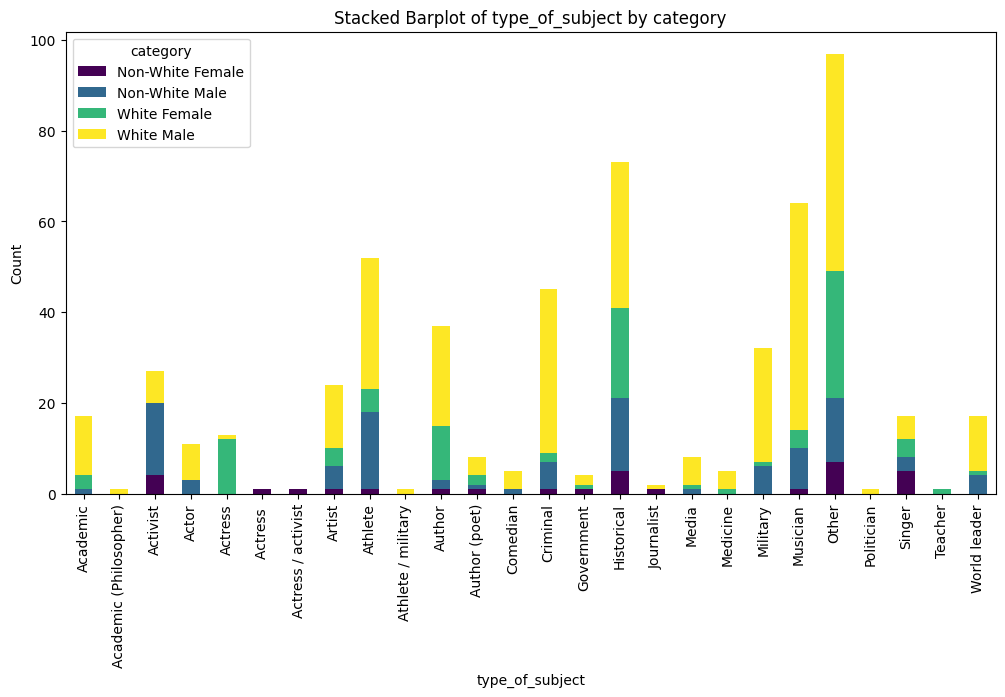

In [17]:
# Generate a plot using a method in the EDA class.
eda.category_plt()

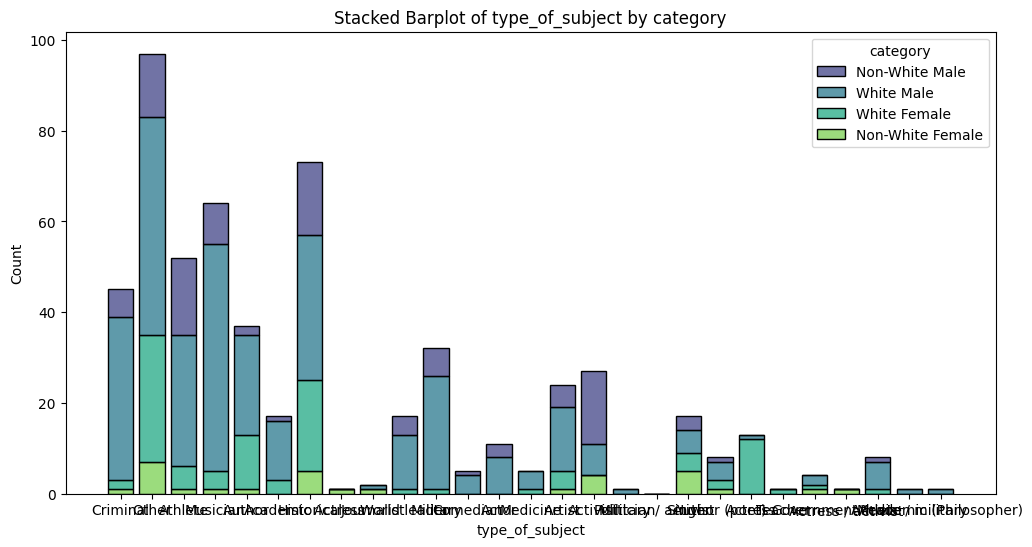

In [18]:
# Create a category plot using Seaborn.
eda.category_plt_seaborn()

The graph indicates the following:

* White males are predominantly represented across all categories.
* This prominence of white males is particularly noticeable in categories such as politicians and businesspeople.
* Women of color appear to have the lowest representation in nearly all categories, especially noticeable within the politician, businessperson, and scientist categories.
* The representation of the other three groups is significantly lower compared to white males across all categories.

#### Analysing the attribute subject_race

In [19]:
# Extract unique races from 'subject_race' column.
unique_subject_races = eda.unique_values('subject_race')
unique_subject_races

array(['African American', 'White', 'Asian American', 'Hispanic (White)',
       'Multi racial', 'Hispanic (Latino)', 'Indian',
       'Hispanic (Latin American)', 'Middle Eastern', 'Mediterranean',
       'Caribbean', 'African', 'Middle Eastern (White)',
       'Native American', 'Asian', 'Eurasian', 'Hispanic (Latina)'],
      dtype=object)

In [20]:
# Count occurrences of each race in 'subject_race' column.
country_subject_race = eda.unique_value_counts('subject_race')
country_subject_race

subject_race
White                        428
African American              35
Multi racial                  24
Hispanic (Latin American)     13
Middle Eastern (White)        13
Middle Eastern                11
African                        9
Hispanic (Latino)              6
Hispanic (White)               6
Asian                          5
Native American                4
Asian American                 3
Indian                         2
Caribbean                      2
Mediterranean                  1
Eurasian                       1
Hispanic (Latina)              1
Name: count, dtype: int64

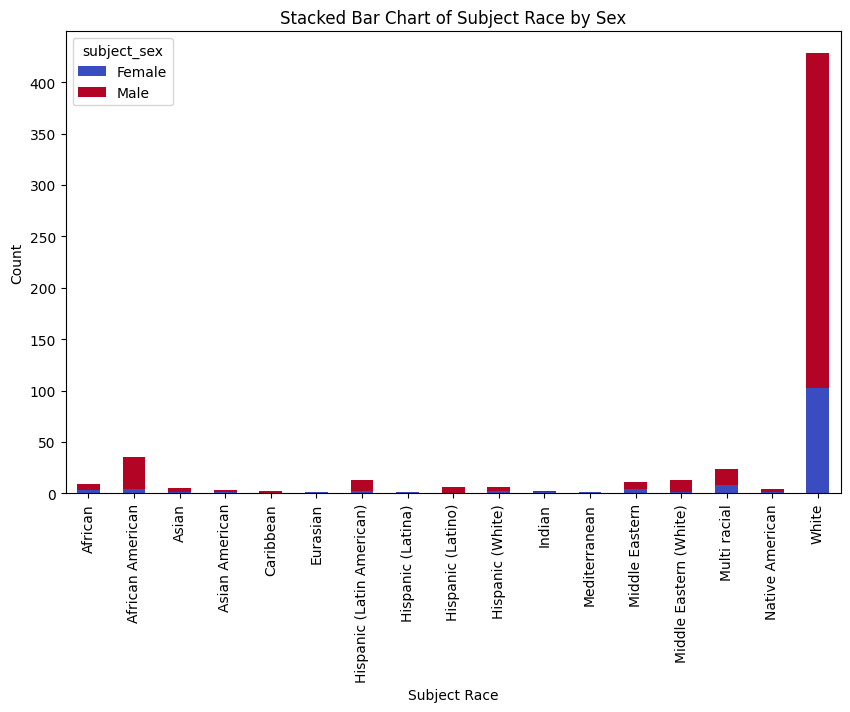

In [21]:
# Display a stacked plot of race and sex distributions.
eda.race_sex_stacked_plot()

From this chart, we can conclude:

* The representation of males is higher than females across almost all racial categories.
* The disparity between male and female counts is particularly pronounced in certain racial groups, such as Native American and White.
* The "White" category has the highest count for both sexes, with a notably larger male representation.
* The counts for both sexes in other racial categories such as African, Asian American, and others are relatively low compared to the White category.

#### Analysing the attribute bechdel_rating

In [22]:
# Retrieve unique Bechdel ratings from 'bechdel_rating' column.
unique_bechdel_ratings = eda.unique_values('bechdel_rating')
unique_bechdel_ratings

array([1, 3, 2, 0], dtype=object)

In [23]:
# Get count of each Bechdel rating in 'bechdel_rating' column.
country_bechdel_rating = eda.unique_value_counts('bechdel_rating')
country_bechdel_rating

bechdel_rating
3    116
1     56
2     32
0     17
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

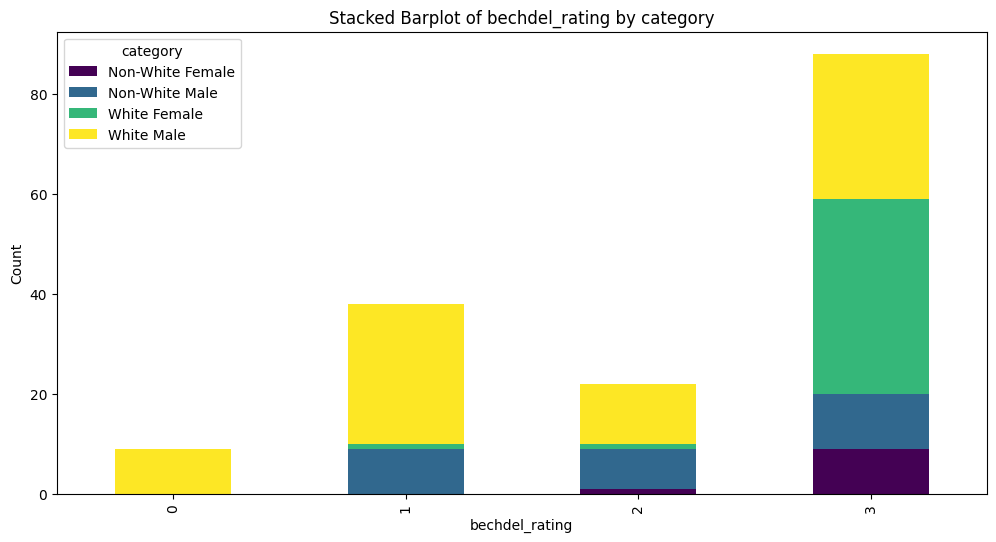

In [24]:
# Plot Bechdel ratings distribution using a categorical plot method.
eda.category_plt(type_col='bechdel_rating')

From the chart, we can draw the following conclusions:

* In the 0 rating category, white males are notably the most represented group.
* For the 1 and 2 rating categories, white males make up the majority, followed by non-white males.
* In the 3 rating category, the number of females increases significantly.

#### Analysing the attribute year_release

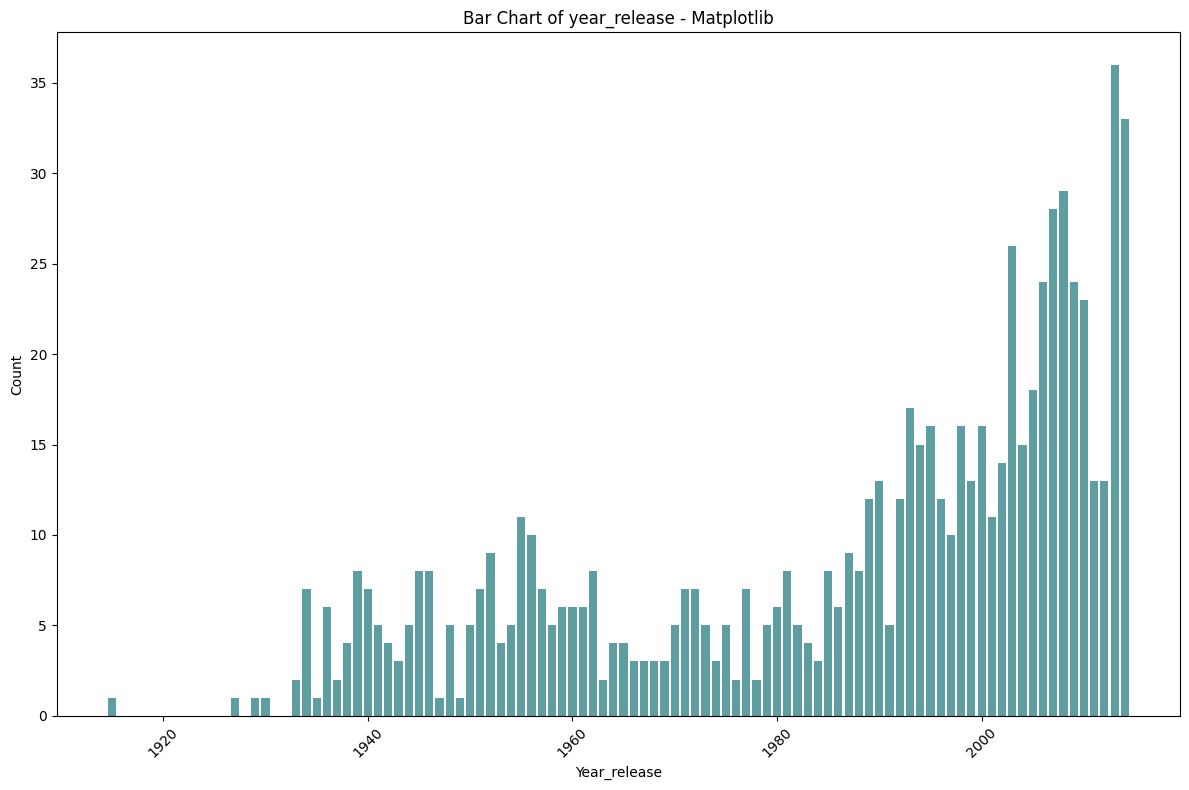

In [25]:
# Create a bar plot for 'year_release' using Matplotlib in the EDA instance.
eda.bar_plot_matplotlib('year_release')

d:\biopic_analysis\src\biogic_analysis\exploratory_data_analysis.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self.df[column].value_counts().index, y=self.df[column].value_counts().values, palette='Spectral')


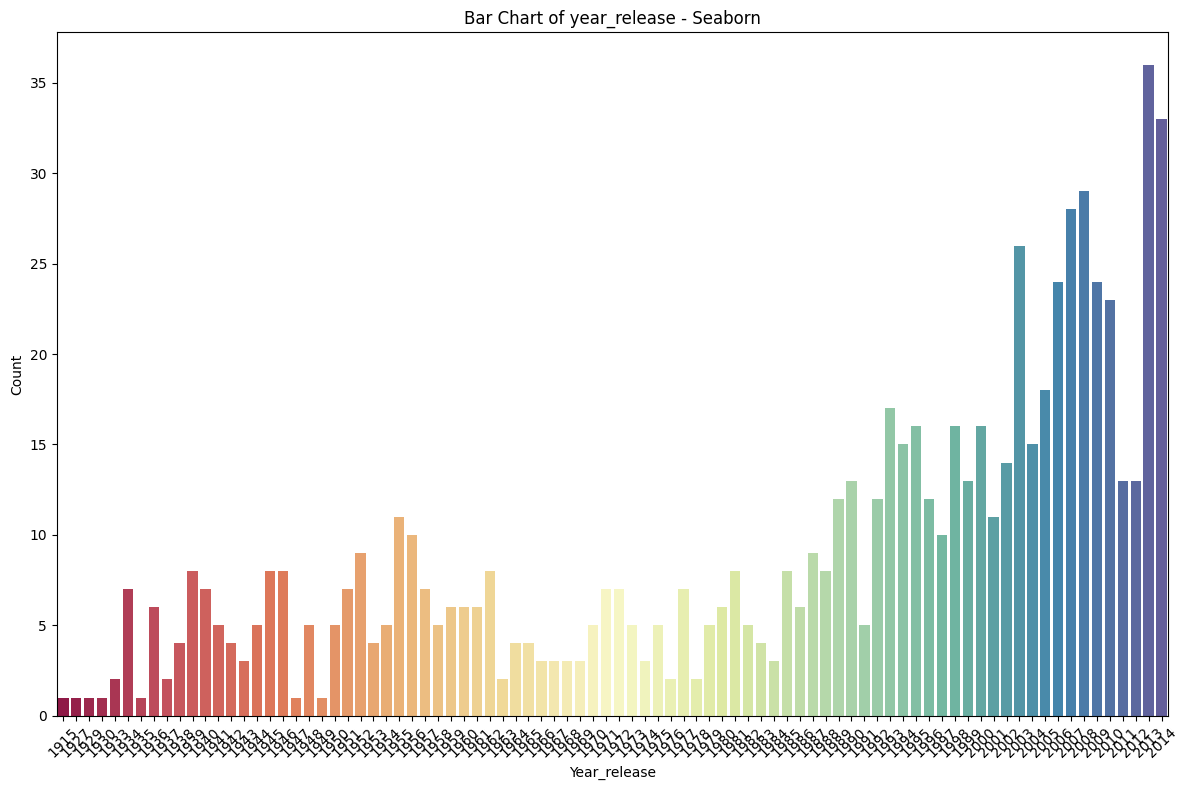

In [26]:
# Generate a bar plot for 'year_release' using Seaborn.
eda.bar_plot_seaborn('year_release')

From the chart, we found that

There were very few releases in the early part of the 20th century, specifically from the 1952s to the 1969s.
The highest frequency of releases in 2000.

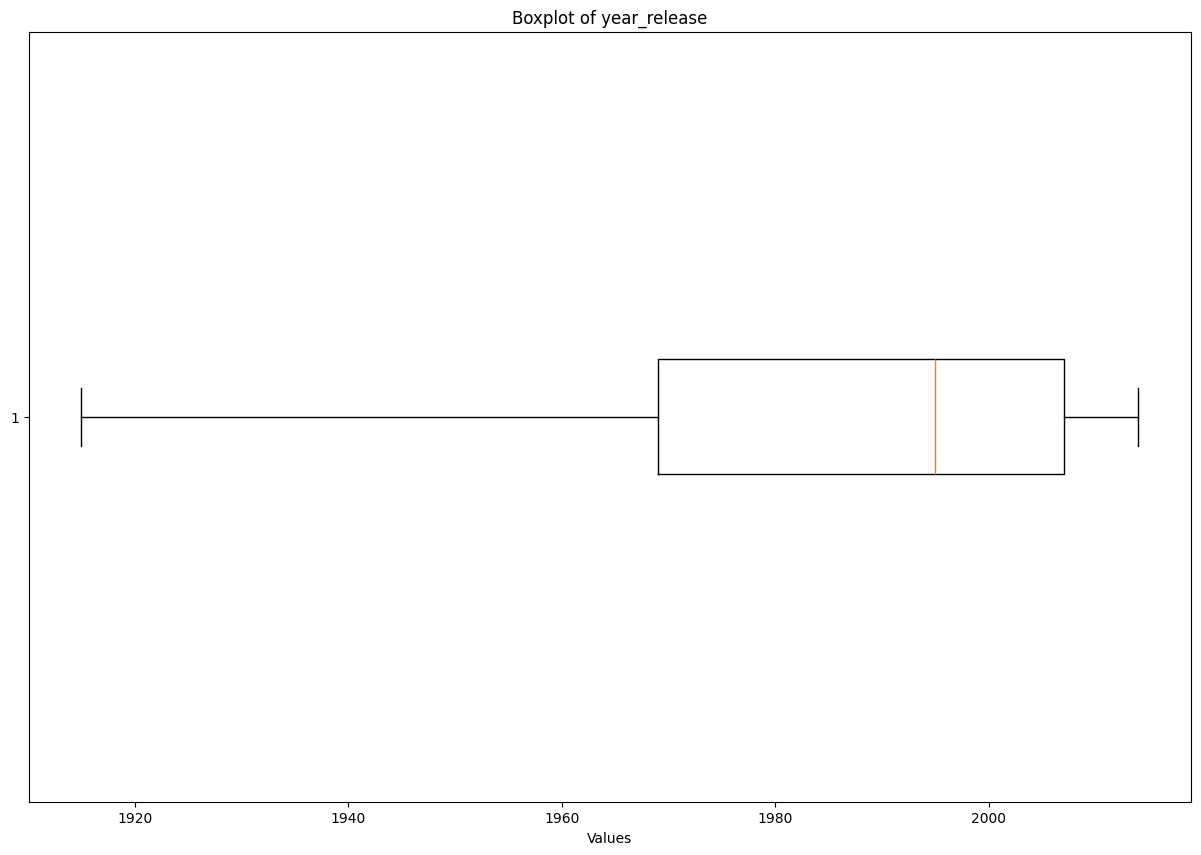

In [27]:
# Visualize 'year_release' data using a column plot method in EDA.
eda.column_plt("year_release")

d:\biopic_analysis\src\biogic_analysis\exploratory_data_analysis.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df[column], orient="h", palette="coolwarm")


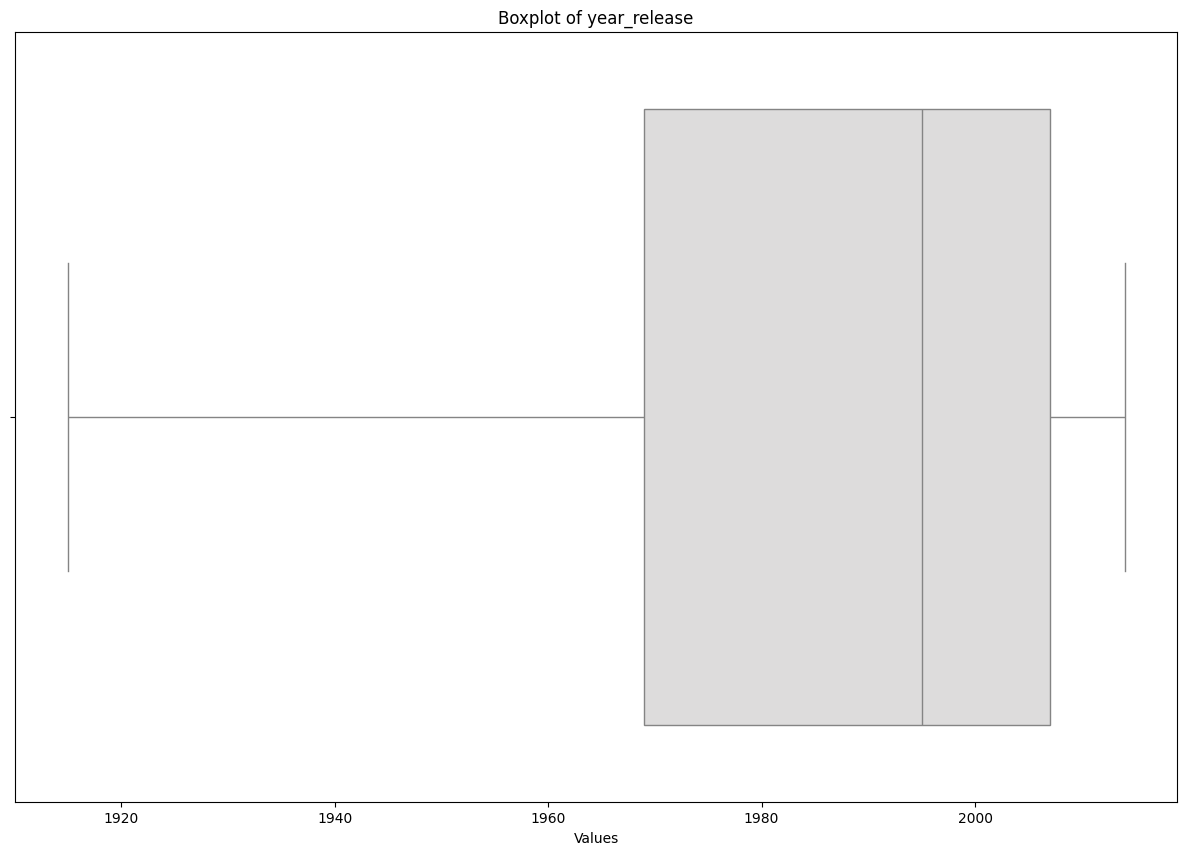

In [28]:
# Display 'year_release' data using a column plot with Seaborn in EDA.
eda.column_sns("year_release")

d:\biopic_analysis\src\biogic_analysis\exploratory_data_analysis.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


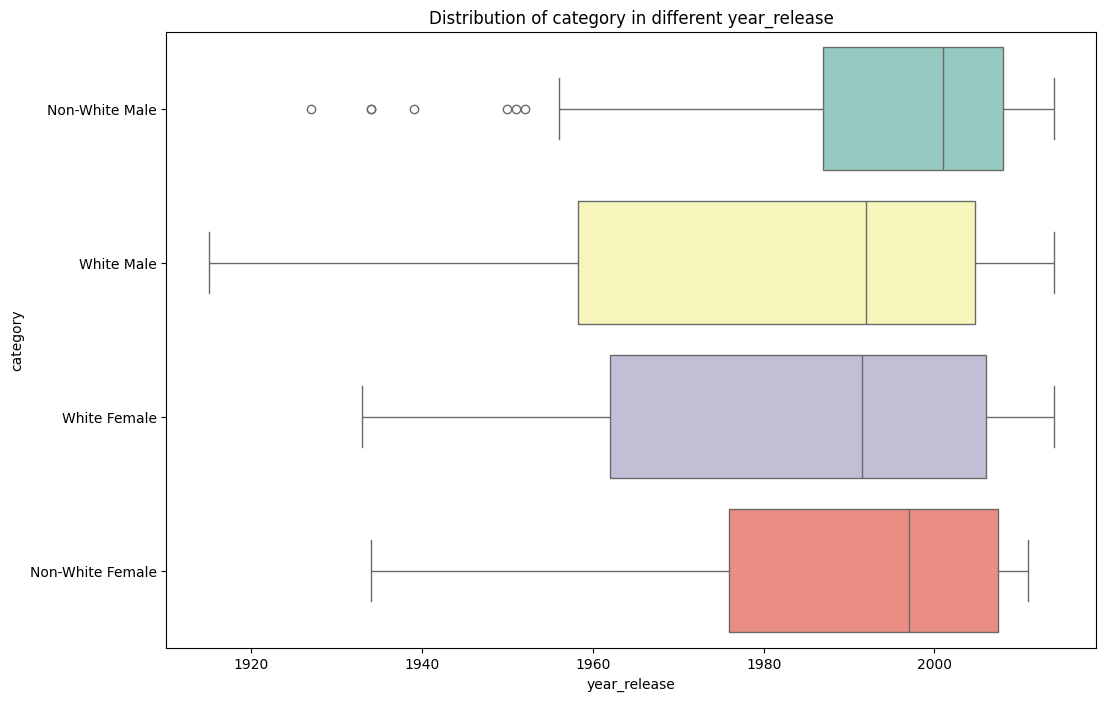

In [29]:
# Create a boxplot comparing 'year_release' and 'category' in the EDA instance.
eda.column_boxplot('year_release', 'category')

Here are some conclusions that can be drawn from the chart:

* Non-white male and white male categories have a wider range of release years.
* White females have a narrower range of release years compared to males.
* Non-white females have the narrowest range and the latest median release year.

#### Analysing the attribute box_office

In [30]:
# Get descriptive statistics for the 'box_office' column.
box_office_stats = eda.describe_stats('box_office')
box_office_stats

count    4.370000e+02
mean     2.298117e+07
std      3.831136e+07
min      3.150000e+03
25%      1.170000e+06
50%      6.140000e+06
75%      3.050000e+07
max      3.500000e+08
Name: box_office, dtype: float64

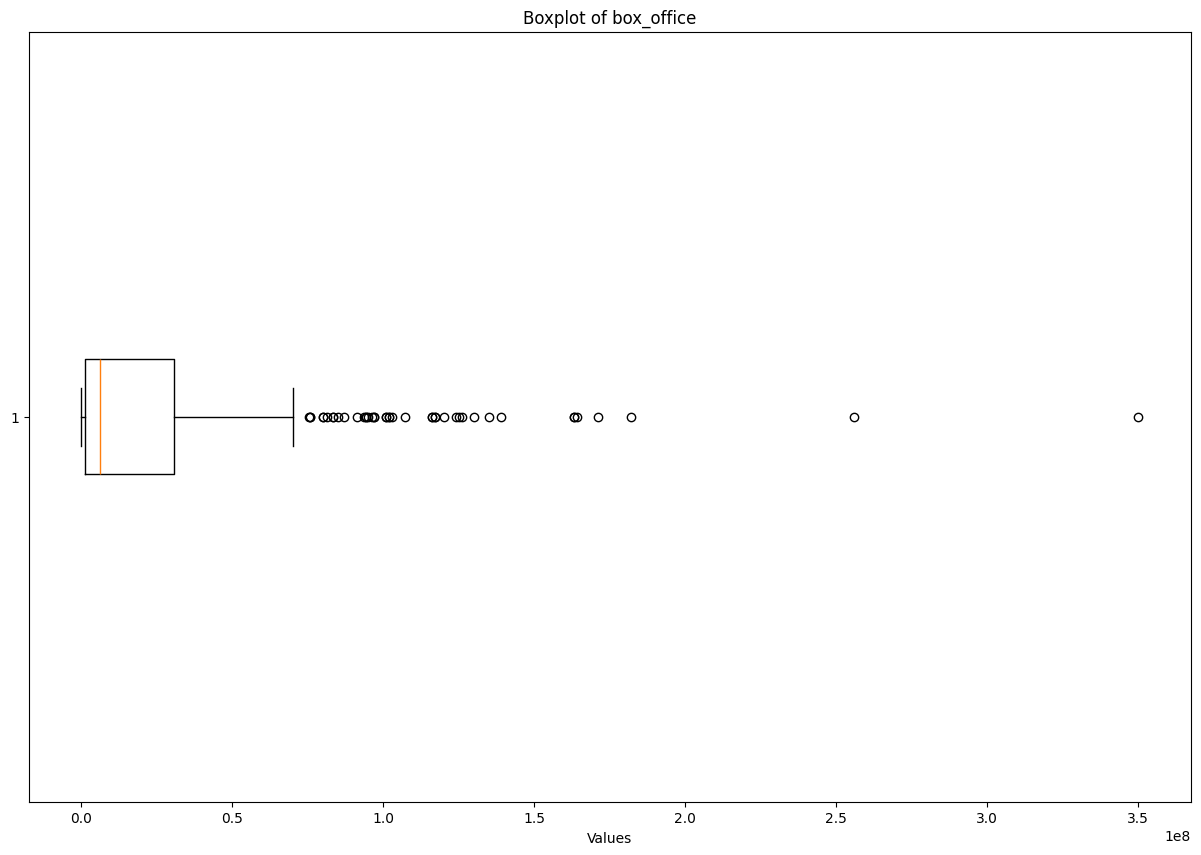

In [31]:
# Plot 'box_office' data using a column plot method in EDA.
eda.column_plt("box_office")

d:\biopic_analysis\src\biogic_analysis\exploratory_data_analysis.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df[column], orient="h", palette="coolwarm")


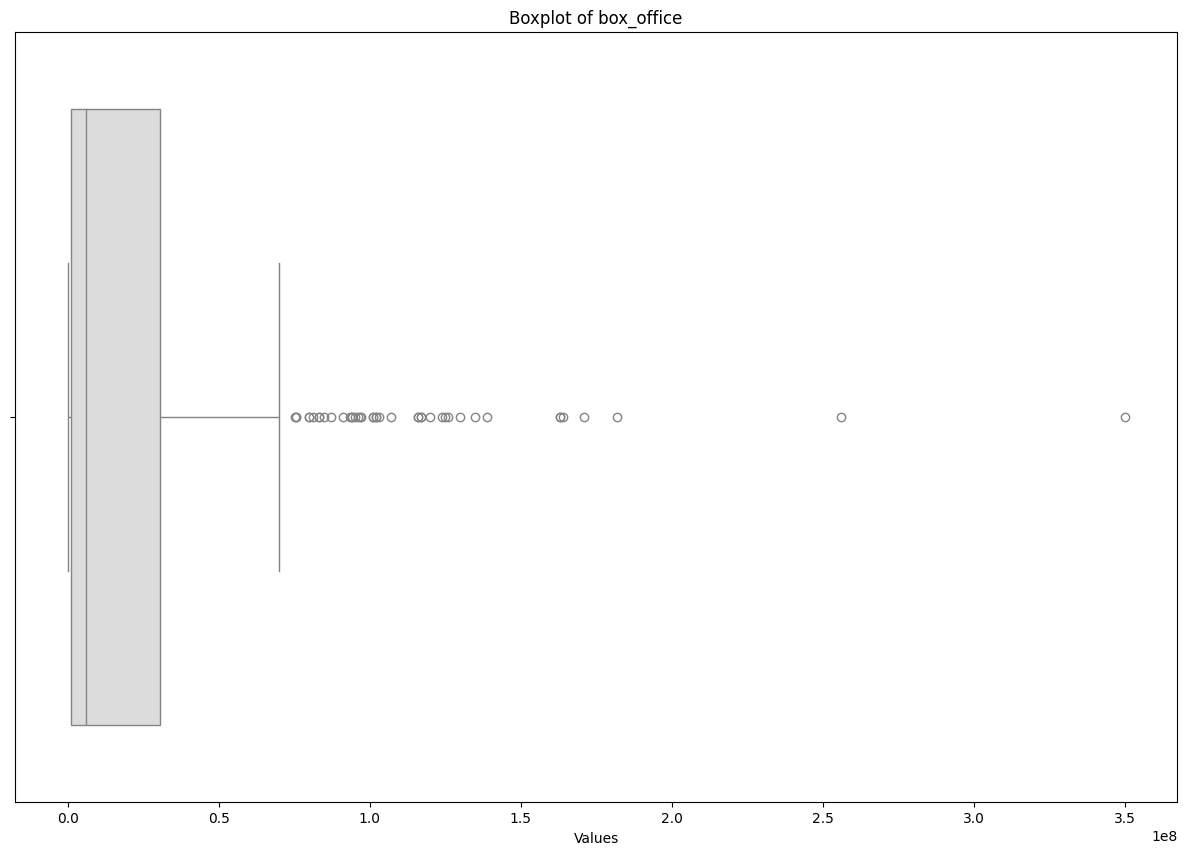

In [32]:
# Visualize 'box_office' data with a column plot using Seaborn in EDA.
eda.column_sns("box_office")

d:\biopic_analysis\src\biogic_analysis\exploratory_data_analysis.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


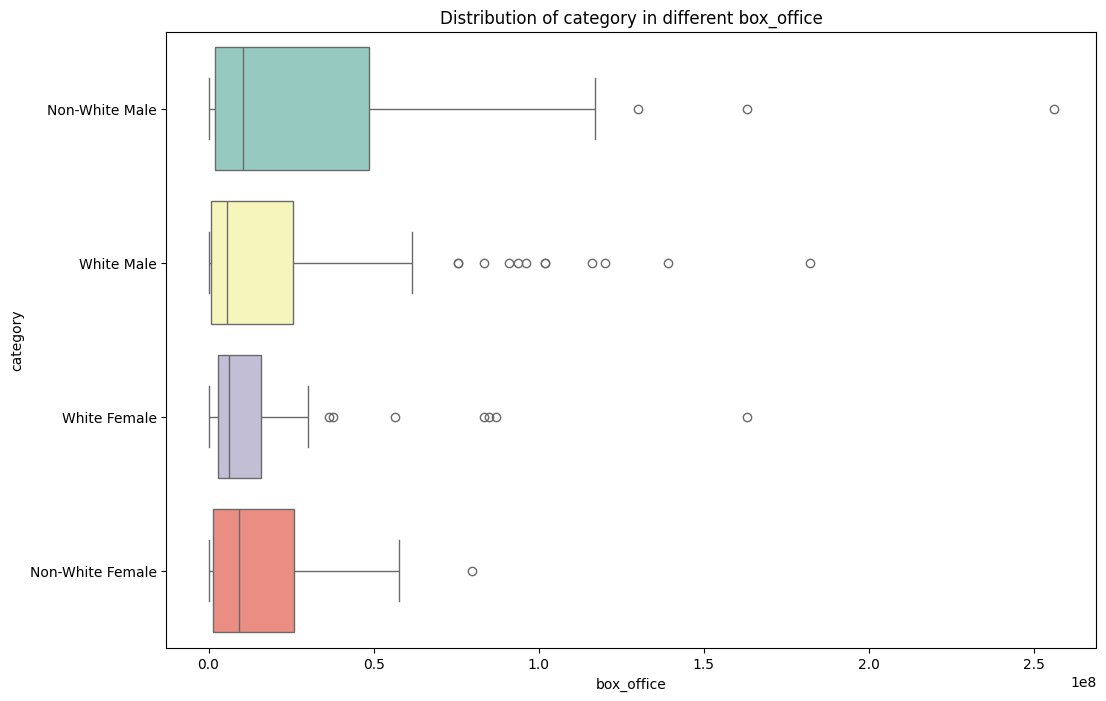

In [36]:
# Create a custom boxplot for 'box_office' against 'category' in EDA.
eda.column_boxplot('box_office', 'category')

From this chart, we can infer the following:

* Non-white females have the lowest median box office revenue and the least variation.
* White males have a higher median revenue than non-white males and white females, as well as a wider range of revenues.
* Non-white males and white females have a similar median box office revenue, but non-white males have a wider range.

## 4: Inference

In [38]:
# Import the Inference class from the inference module in the src/biogic_analysis directory.
from src.biogic_analysis.inference import Inference

# Create an instance of the Inference class using a pandas DataFrame 'df'
inference_analysis = Inference(df)


#### Diversity in Gender and Race:

* Research Question: What is the representation of characters of different races and genders in the top 100 highest-grossing films?

* Analysis Method: We will utilize a grouped bar chart to visually represent the distribution of characters based on their race and gender in the top 100 highest-grossing films..

<Figure size 1200x800 with 0 Axes>

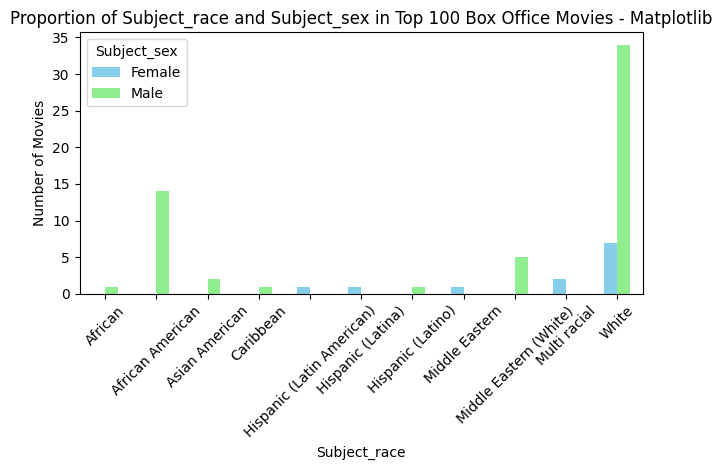

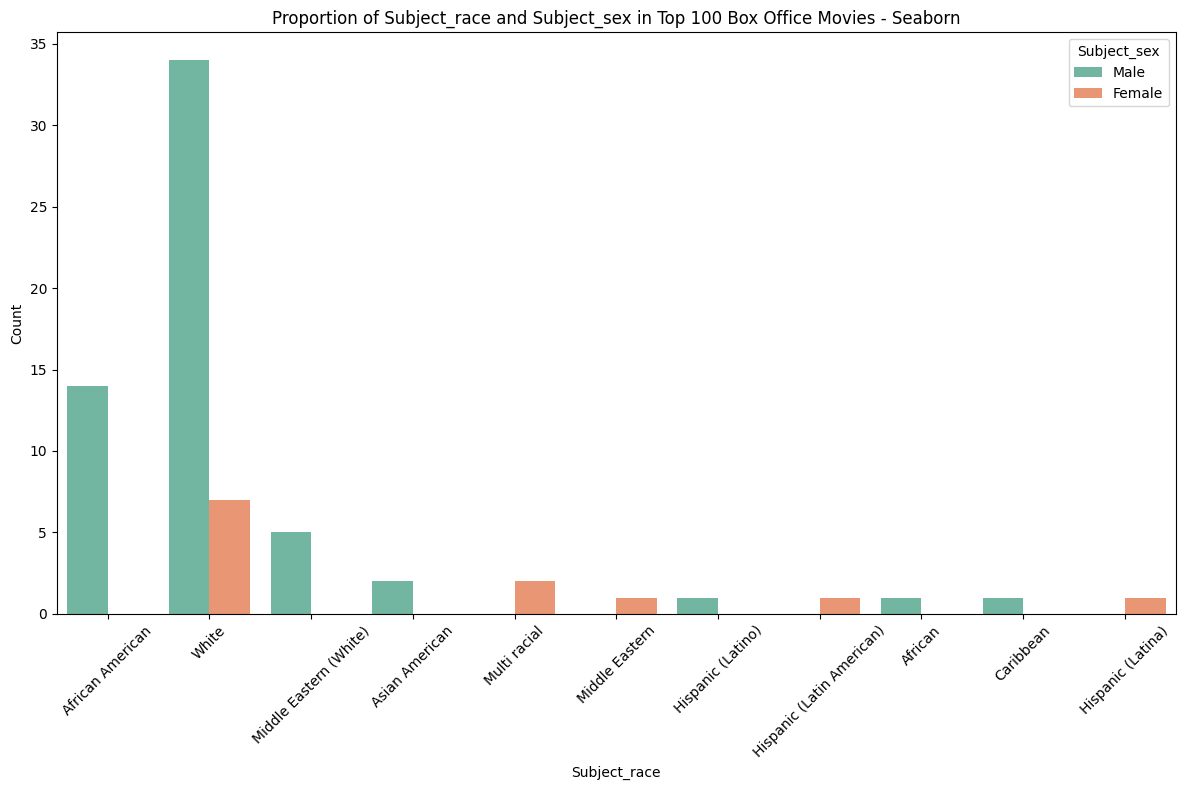

In [39]:
# Analyze the proportion of different races and sexes in the top box office category.
inference_analysis.proportion_in_top_box_office('subject_race', 'subject_sex')

From the chart, we can draw the following conclusions:

* In the top 100 grossing films, the number of characters who are white males and white females is significantly higher than those of other races and genders.
* Non-white males have a slightly higher representation compared to non-white females, but it is still notably lower than that of white males and white females.
* There is an imbalance in gender and racial diversity, with higher representation of white males and white females in these films.
* Non-white females have relatively fewer roles in these films and are among the least represented groups.

#### Box Office and Diversity Relationship:

Research Question: Does the racial and gender diversity of a movie affect its box office performance?
Analysis Method: We will use scatter plots to compare the relationship between the racial and gender diversity of movies and their box office earnings.

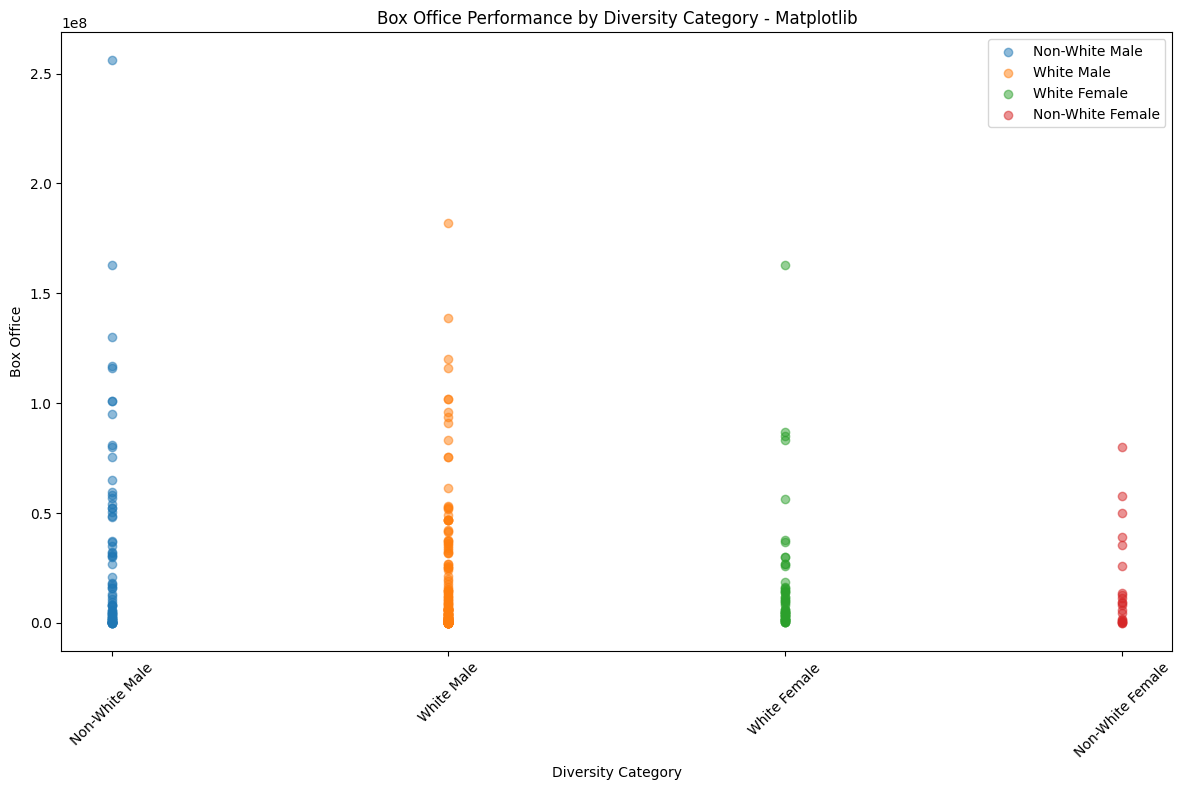

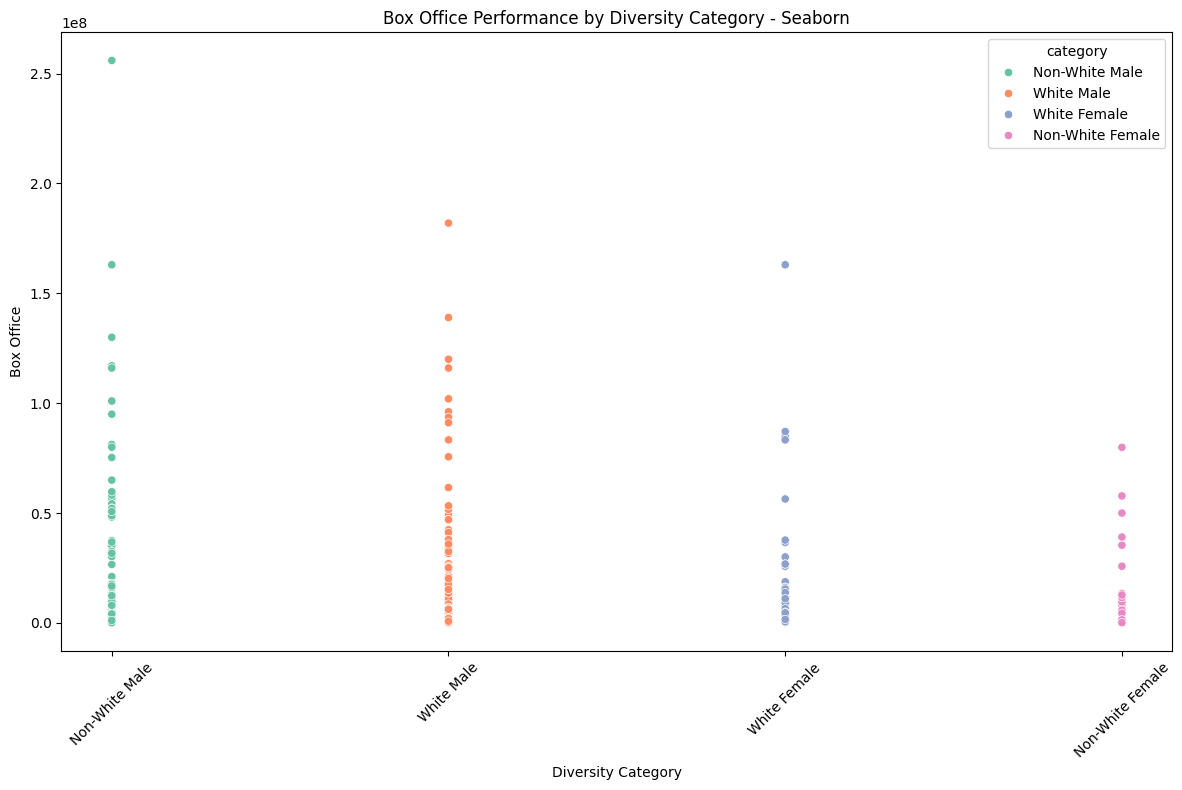

In [ ]:
# Evaluate the correlation between box office success and diversity factors.
inference_analysis.box_office_diversity_correlation()

From the chart, we can draw the following conclusions:

* "White Male" films show a broad range of box office results, indicating a high variability in their commercial success.
* Films in the "White Male" category often reach the highest box office values, suggesting they are typically more successful financially.
* "Non-White Female" films tend to cluster at the lower end of box office earnings, implying they are less successful commercially compared to other categories.
* The scarcity of "Non-White Female" films might indicate industry biases or unequal production and distribution opportunities.

#### Time Trend Analysis:

Research Question: Has there been an improvement in racial and gender diversity in movies in recent years?
Analysis Method: We will use line charts to show the changes in the proportions of races and genders in movies across different years.

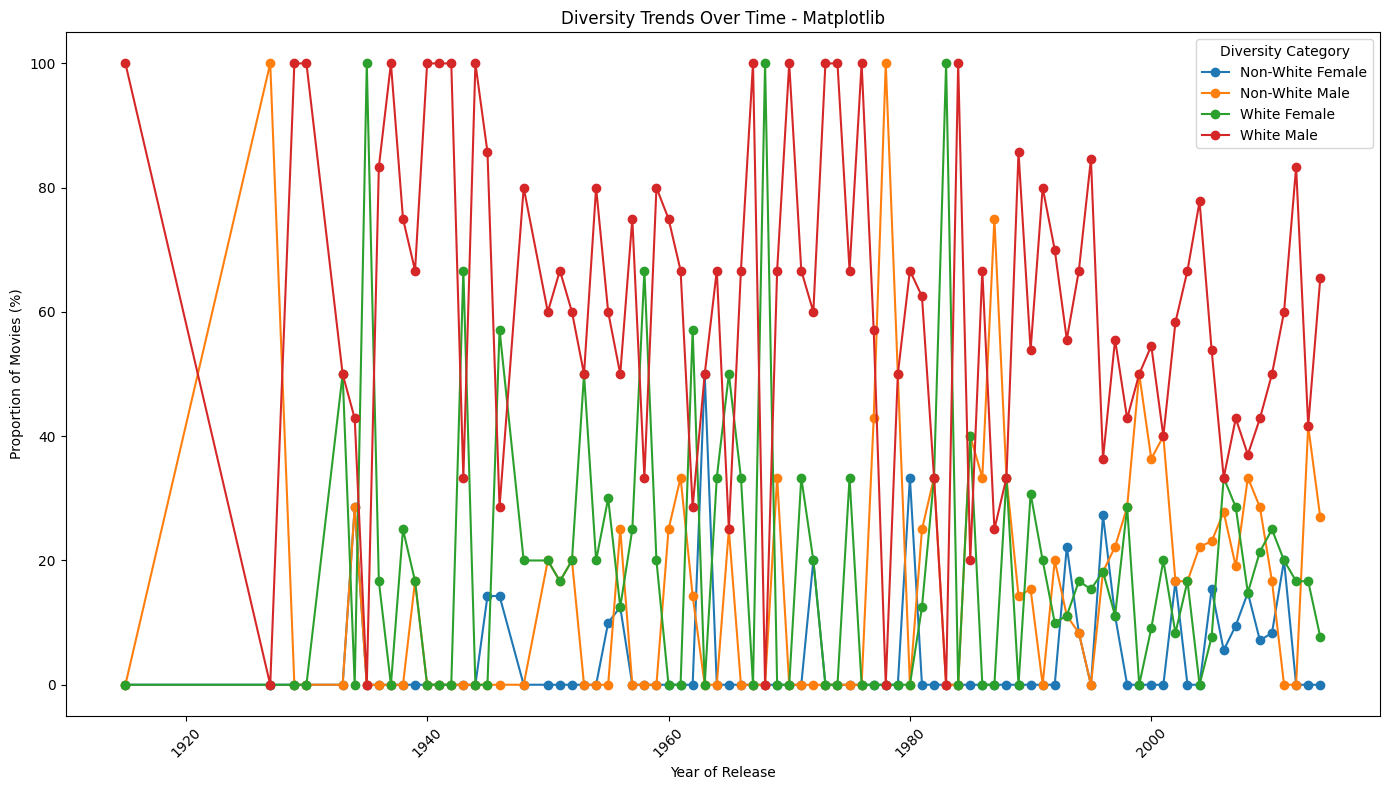

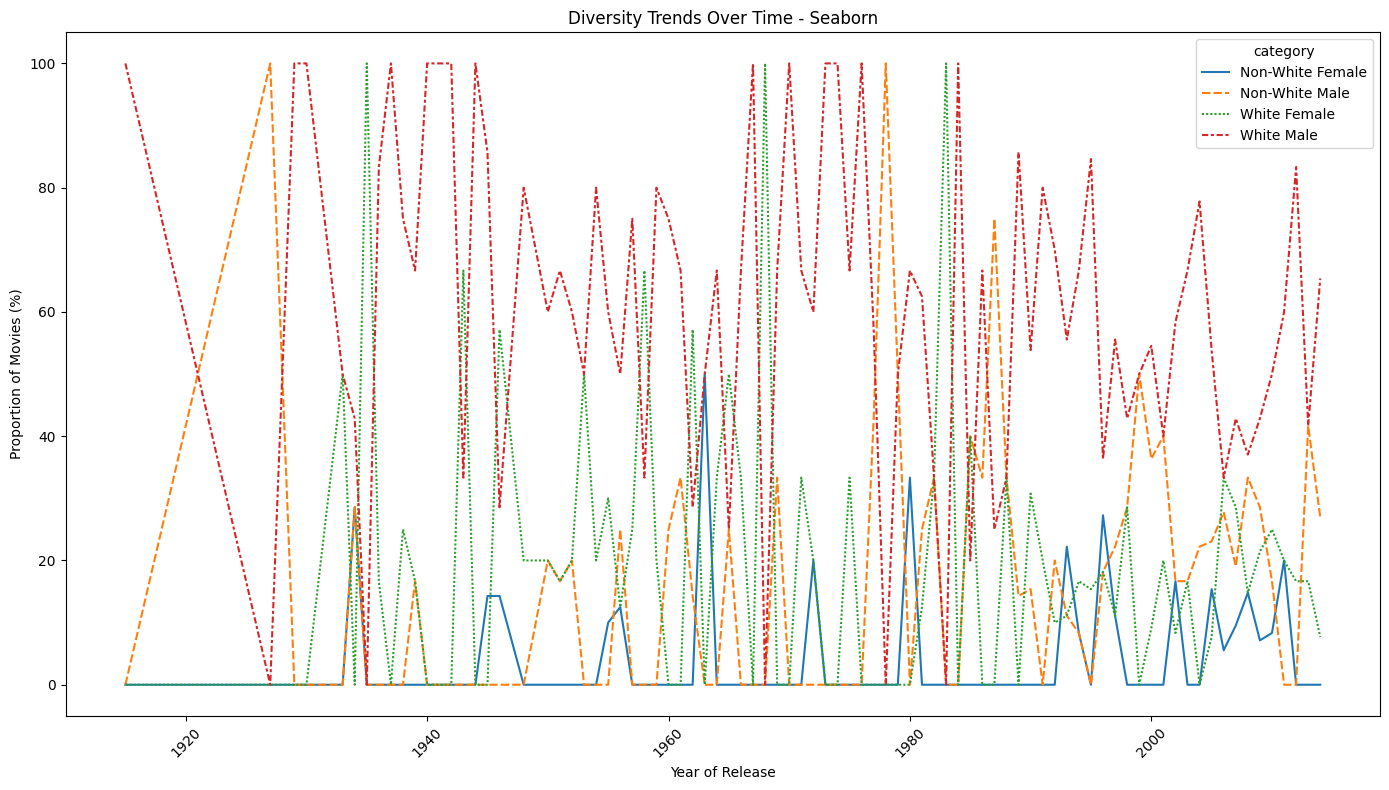

In [ ]:
# Examine trends in diversity over time in relation to the dataset.
inference_analysis.diversity_trends_over_time()

From the chart, we can draw the following conclusions:

* There is significant fluctuation in representation over time for all categories, with White Males showing the most variation and Non-White Females the least.
* White Males consistently hold the highest proportion throughout most of the timeline, indicating their dominance in film roles over the century.
* In recent years, there appears to be a general upward trend for both Non-White Females and Non-White Males, though still significantly lower than White Males, suggesting an improvement in diversity representation, in line with contemporary social movements and calls for more inclusive casting.

## 5: Conclusion

The analysis of Hollywood biographical films from 1915 to 2014 reveals a stark imbalance in gender and racial representation. About a quarter of these films featured women, with only 21 focusing on women of color. Over 80% of subjects were white and 77% male, a trend also evident in the top 100 highest-grossing films. The 1990s saw a significant skew towards white subjects.

This pattern reflects historical societal biases, particularly the early focus on white male figures in biopics. While there has been some progress in recent years, the imbalance is still pronounced. Emerging platforms like television and Netflix, however, provide avenues for more diverse biographical stories. This shift highlights the ongoing need to diversify storytelling in the biographical film genre.

## References

- Molin, S. (2019, July 9). *Hands-On Data Analysis with Pandas*.
- 'Straight Outta Compton' Is The Rare Biopic Not About White Dudes. (2015, August 14). Retrieved from [https://fivethirtyeight.com/features/]